In [20]:
import pandas as pd
sales = pd.read_csv(r"C:\Project_Guvi\Capstone5\Pizza_Sale - pizza_sales.csv")
ing = pd.read_csv(r"C:\Project_Guvi\Capstone5\Pizza_ingredients - Pizza_ingredients.csv")

In [22]:
print(sales.isnull().sum())
print("Column Names")
print(sales.columns)
print("Info")
print(sales.info())
print("Duplicated Values")
print(sales.duplicated().sum())
print("Unique Values")
print(sales.nunique())

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64
Column Names
Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time

In [24]:
sales[['quantity','pizza_size','pizza_category']].apply(lambda x: x.unique())

quantity                                      [1, 2, 3, 4]
pizza_size                              [M, L, S, XL, XXL]
pizza_category    [Classic, Veggie, Supreme, Chicken, nan]
dtype: object

In [26]:
missing_value_columns_name = ['pizza_name_id', 'total_price', 'pizza_category', 
                               'pizza_ingredients', 'pizza_name']

# Function to fill missing values in the specified column using other columns
def fill_missing_values(sales, column_to_fill, reference_columns):
    for idx, row in sales[sales[column_to_fill].isnull()].iterrows():
        ref_values = row[reference_columns]
        matching_row = sales[(sales[reference_columns] == ref_values).all(axis=1) & sales[column_to_fill].notnull()]
        if not matching_row.empty:
            sales.at[idx, column_to_fill] = matching_row[column_to_fill].values[0]

# Apply the function to each column with missing values
for column in missing_value_columns_name:
    ref_columns = [col for col in missing_value_columns_name if col != column]
    fill_missing_values(sales, column, ref_columns)    

In [27]:
sales.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [30]:
sales.to_csv("C:\\Project_Guvi\\Capstone5\\Update_Sales_data.csv",index = False)

In [13]:
# ingredients dataset
print("Missing Value")
print(ing.isnull().sum())
print("Columns Name")
print(ing.columns)
print("Info")
print(ing.info())
print("Duplicated Values")
print(ing.duplicated().sum())
print("Unique Values")
print(ing.nunique())

Missing Value
pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64
Columns Name
Index(['pizza_name_id', 'pizza_name', 'pizza_ingredients',
       'Items_Qty_In_Grams'],
      dtype='object')
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  514 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB
None
Duplicated Values
0
Unique Values
pizza_name_id         91
pizza_name            32
pizza_ingredients     64
Items_Qty_In_Grams    17
dtype: int64


In [15]:
# rows with missing value
ing[ing['Items_Qty_In_Grams'].isnull()]

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
24,brie_carre_s,The Brie Carre Pizza,Caramelized Onions,NaN
149,hawaiian_l,The Hawaiian Pizza,Sliced Ham,NaN
152,hawaiian_m,The Hawaiian Pizza,Sliced Ham,NaN
155,hawaiian_s,The Hawaiian Pizza,Sliced Ham,NaN


In [17]:
# filling missing values in "Items_Qty_In_Grams" column
import pandas as pd
import numpy as np

# Step 1: Create a new 'pizza_size' column by extracting the last character from 'pizza_name_id'
ing['pizza_size'] = ing['pizza_name_id'].str[-1]

# Step 2: Map the extracted character to actual size labels
size_mapping = {'s': 'S', 'm': 'M', 'l': 'L'}
ing['pizza_size'] = ing['pizza_size'].map(size_mapping)

# Step 3: Calculate the average 'Items_Qty_In_Grams' for each 'pizza_size'
average_qty_by_size = ing.groupby('pizza_size')['Items_Qty_In_Grams'].mean().round()

# Step 4: Fill missing values using the average for the corresponding pizza size
def fill_missing_values(row):
    if pd.isna(row['Items_Qty_In_Grams']):
        return average_qty_by_size.get(row['pizza_size'], np.nan)
    return row['Items_Qty_In_Grams']

# Apply the function to fill missing values
ing['Items_Qty_In_Grams'] = ing.apply(fill_missing_values, axis=1)

ing = ing.drop(['pizza_size'],axis=1)

# Save the updated dataset
ing.to_csv('C:\\Project_Guvi\\Capstone5\\Updated_ingredients_data.csv', index=False)




In [1]:
# cleaned dataset
import pandas as pd
dfs = pd.read_csv('C:\\Project_Guvi\\Capstone5\\Updated_Pizza_sales.csv')
ings = pd.read_csv('C:\\Project_Guvi\\Capstone5\\Updated_Pizza_ing.csv')

In [ ]:
dfs

In [5]:
def parse_dates(date):
  for fmt in ('%d-%m-%Y', '%d/%m/%Y'):
    try:
      return pd.to_datetime(date, format=fmt)
    except ValueError:
      pass
  raise ValueError(f'no valid date format found for {date}')

dfs['order_date'] = dfs['order_date'].apply(parse_dates)

def extra_features_from_date(df):
    df['day_of_week'] = df['order_date'].dt.weekday +1 #Starts with 1 as Monday to 7 as Sunday
    df['day_of_year'] = df['order_date'].dt.dayofyear 
    df['day_of_month'] = df['order_date'].dt.day
    df['week_of_year'] = df['order_date'].dt.strftime('%W') #week starts on Monday, new year days preceeding the first monday is week 0
    df['month'] = df['order_date'].dt.month    
    return df


In [7]:
extra_features_from_date(dfs)
dfs.head(2)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week,day_of_year,day_of_month,week_of_year,month
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,4,1,1,00,1
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,4,1,1,00,1


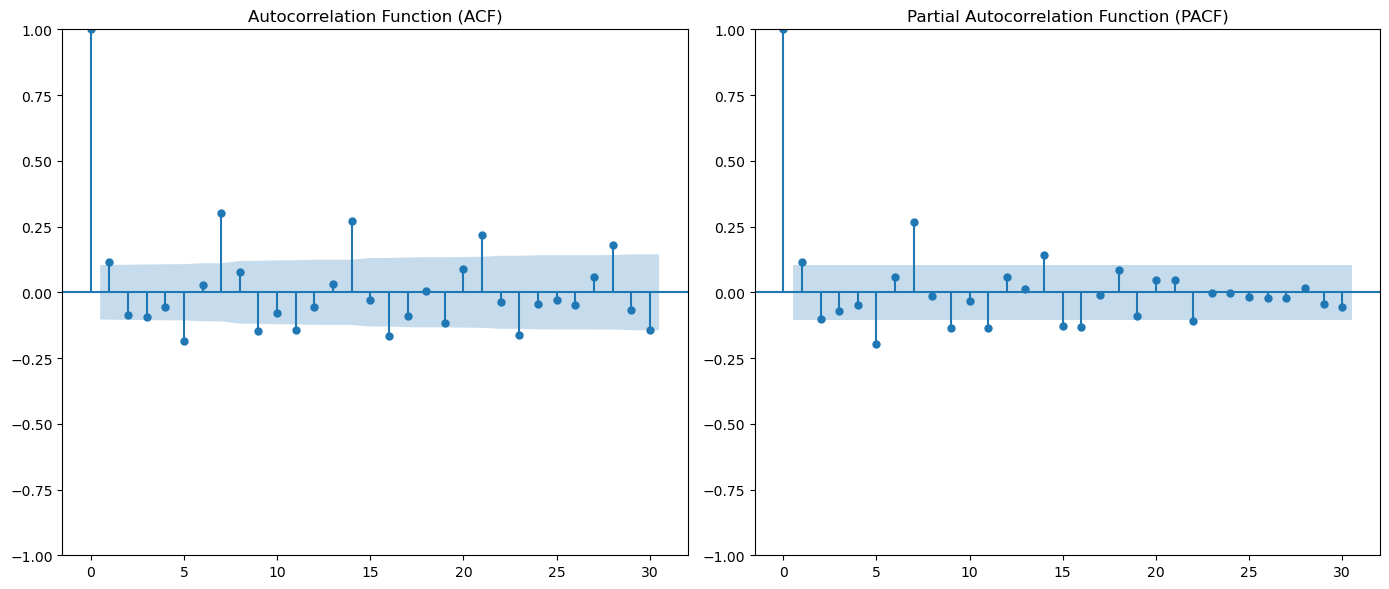

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Aggregate the sales data to daily level
daily_sales = dfs.groupby('order_date').agg({'quantity': 'sum'}).reset_index()

# Plot ACF and PACF
plt.figure(figsize=(14, 6))

# Plot ACF
plt.subplot(1, 2, 1)
plot_acf(daily_sales['quantity'], lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(daily_sales['quantity'], lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


d = 0,p =1,q =1

In [12]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
result = adfuller(daily_sales['quantity'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Values {key}: {value}')


ADF Statistic: -5.220180249748951
p-value: 7.995231865646661e-06
Critical Values 1%: -3.4496162602188187
Critical Values 5%: -2.870028369720798
Critical Values 10%: -2.5712922615505627


In [16]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Grouping the data by 'order_date' and summing 'quantity'
daily_sales = dfs.groupby('order_date')['quantity'].sum().reset_index()

# Function to train ARIMA model and calculate overall MAPE
def evaluate_arima_model_overall(data, p, d, q):
    actual_values = []
    predicted_values = []
    
    # Set 'order_date' as index
    data.set_index('order_date', inplace=True)
    
    # Split the data into training and testing sets (80-20 split)
    split_point = int(len(data) * 0.8)
    train, test = data['quantity'][:split_point], data['quantity'][split_point:]
    
    # Build the ARIMA model
    model = ARIMA(train, order=(p, d, q))
    fitted_model = model.fit()
    
    # Forecast for the length of the test set
    forecast = fitted_model.forecast(steps=len(test))
    
    # Collect actual and predicted values for overall MAPE calculation
    actual_values.extend(test.values)
    predicted_values.extend(forecast)
    
    # Calculate overall MAPE
    overall_mape = mean_absolute_percentage_error(actual_values, predicted_values)
    
    return overall_mape

# Evaluate the model with the chosen p, d, q values
p, d, q = 1, 0, 1
overall_mape = evaluate_arima_model_overall(daily_sales, p, d, q)

# Display the overall MAPE
print(f'Overall MAPE: {overall_mape:.2%}')


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Overall MAPE: 16.54%


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [18]:
import pandas as pd
import numpy as np

# Load the data
pizza_sales_data = pd.read_csv('C:\\Project_Guvi\\Capstone5\\Updated_Pizza_sales.csv')
ingredients_data = pd.read_csv('C:\\Project_Guvi\\Capstone5\\Updated_Pizza_ing.csv')

predictions = np.random.randint(50, 100, size=7)  # Replace this with the actual ARIMA model's forecast

# Function to calculate ingredient requirements based on predicted sales
def calculate_ingredients(predicted_sales, ingredient_data):
    # Initialize a dictionary to hold ingredient requirements
    ingredient_requirements = {}

    # For each predicted day of sales
    for i, daily_sales in enumerate(predicted_sales):
        print(f"Day {i + 1} Sales Prediction: {daily_sales}")

        # Get unique pizza types from the ingredient dataset
        unique_pizza_types = ingredient_data['pizza_name_id'].unique()
        num_pizza_types = len(unique_pizza_types)

        # Proportionally distribute sales across pizza types
        for pizza in unique_pizza_types:
            pizza_sales = daily_sales / num_pizza_types  # Simple proportional split
            ingredients_for_pizza = ingredient_data[ingredient_data['pizza_name_id'] == pizza]

            # Calculate the required ingredients for each pizza type
            for _, row in ingredients_for_pizza.iterrows():
                ingredient = row['pizza_ingredients']
                quantity_needed = pizza_sales * row['Items_Qty_In_Grams']

                # Add up the quantities required for the predicted period
                if ingredient in ingredient_requirements:
                    ingredient_requirements[ingredient] += quantity_needed
                else:
                    ingredient_requirements[ingredient] = quantity_needed

    return ingredient_requirements

# Calculate the ingredients required for the predicted sales
ingredient_requirements = calculate_ingredients(predictions, ingredients_data)

# Create a purchase order DataFrame
purchase_order = pd.DataFrame(ingredient_requirements.items(), columns=['Ingredient', 'Quantity'])

# Display the purchase order
print(purchase_order)


Day 1 Sales Prediction: 78
Day 2 Sales Prediction: 68
Day 3 Sales Prediction: 81
Day 4 Sales Prediction: 83
Day 5 Sales Prediction: 52
Day 6 Sales Prediction: 67
Day 7 Sales Prediction: 78
                 Ingredient     Quantity
0         Barbecued Chicken   501.428571
1               Red Peppers  1671.428571
2             Green Peppers   919.285714
3                  Tomatoes  6518.571429
4                Red Onions  9694.285714
..                      ...          ...
59                   Onions   334.285714
60       Soppressata Salami  1671.428571
61        Peperoncini verdi   167.142857
62  Thai Sweet Chilli Sauce   334.285714
63         Beef Chuck Roast  3175.714286

[64 rows x 2 columns]
